***
# <font color=navy size=9>Regressão Polinomial</font>
***

## Dados para regressão
Inicialmente iremos importar os dados para realizar a regressão polinomial.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dados.csv')
df

,X,Y
0,-2.000000,80.719587
1,-1.959596,70.171820
2,-1.919192,74.165193
3,-1.878788,48.018546
4,-1.838384,51.877748
...,...,...
95,1.838384,27.984713
96,1.878788,24.512449
97,1.919192,31.535195
98,1.959596,32.313269


Iremos plotar um gráfico de dispersão para verificar o comportamento dos dados.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0.98, 'Visualização dos Dados')

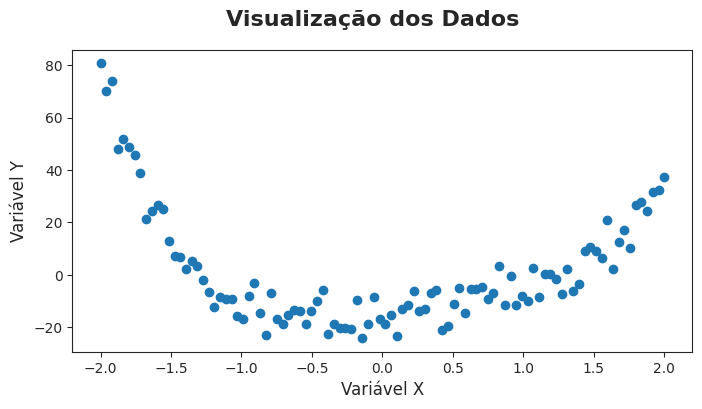

In [4]:
sns.set_style('ticks')
plt.figure(figsize = (8, 4), dpi = 100)
plt.scatter(df['X'], df['Y'])
plt.xlabel('Variável X', size = 12)
plt.ylabel('Variável Y', size = 12)
plt.suptitle('Visualização dos Dados', fontweight='bold', size = 16)

Para realizar a regressão é necessário definir as variáveis.

In [5]:
X = df['X'].values
Y = df['Y'].values

Agora é necessário definir o grau do polinômio que você deseja testar.

> Modifique o valor da variável "grau" para definir o grau do polinômio.

Iremos testar o polinômio de grau 3.

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
grau = 3
carac = PolynomialFeatures(degree=grau)

Nesta etapa iremos realizar a regressão polinomial.

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
X = X.reshape(-1, 1)
X_polinomio = carac.fit_transform(X)
model = LinearRegression()

Agora iremos salvar os resultados.

In [10]:
result_regress = model.fit(X_polinomio, Y)
Y_polinomio = result_regress.predict(X_polinomio)

Vamos visualizar os resultados em gráfico.

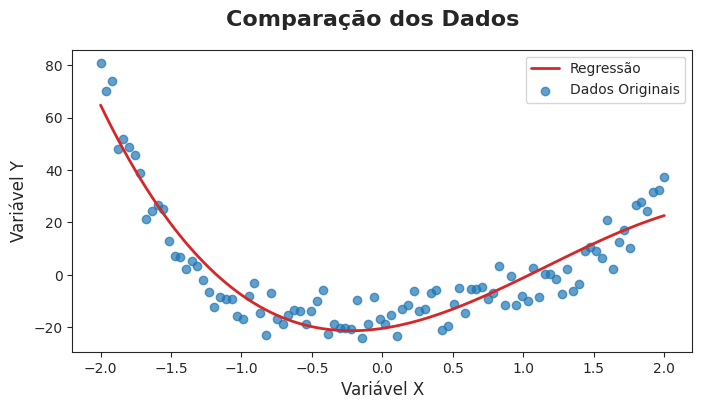

In [11]:
sns.set_style('ticks')
plt.figure(figsize = (8, 4), dpi = 100)
plt.scatter(X, Y, alpha = 0.7, label = 'Dados Originais')
plt.plot(X, Y_polinomio, color = 'tab:red', linewidth = 2, label = 'Regressão');
plt.xlabel('Variável X', size = 12)
plt.ylabel('Variável Y', size = 12)
plt.suptitle('Comparação dos Dados', fontweight='bold', size = 16)
plt.legend()

## Métricas de erros
Vamos visualizar os resultados com algumas métricas de análise de erros.

### R2

O R-quadrado é uma medida de quão próximos os dados estão da linha de regressão ajustada.

* Valor "0" indica que o modelo não explica nada da variabilidade dos dados de resposta ao redor de sua média.
* Valor "1" indica que o modelo explica toda a variabilidade dos dados de resposta ao redor de sua média.

In [12]:
from sklearn.metrics import r2_score
r_2 = r2_score(Y, Y_polinomio)
r_2

0.885656996810128

### RMSE (Root Mean Squared Error)
O RMSE tem é a diferença média de um valor e o seu parâmetro inicial. É destinado a compreender erros de previsão.

In [13]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(Y,Y_polinomio))
rmse

7.44638045715726

### MAE (Mean Absolute Error)
O MAE mede a magnitude média dos erros de previsões, sem considerar sua direção.

In [14]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y,Y_polinomio)
mae

6.224281163722287

## Obtendo a equação da regressão
Como realizamos a regressão para um polinômio de grau 3, iremos encontrar a seguinte equação:

##### $$Y = AX^3 + BX^2 + CX + D$$

### Coeficientes

Inicialmente atribua "result\_regress.coef\_" a variável "coefs".

In [15]:
coefs = result_regress.coef_
coefs

array([ 0.        ,  7.87513606, 16.0427144 , -4.60521705])

Para encontrar um coeficiente é só digitar "coefs[n]" com o número do grau desejado.

Exemplo: Para encontrar o coeficiente do termo de segundo grau é só escrever "coefs[2]".

O resultado é análogo aos outros coeficientes.

In [16]:
A = coefs[3] # Terceiro grau
B = coefs[2] # Segundo grau
C = coefs[1] # Primeiro grau
print("Coeficiente A = {}\nCoeficiente B = {}\nCoeficiente C = {}".format(A, B, C))

Coeficiente A = -4.60521705034287
Coeficiente B = 16.042714402786952
Coeficiente C = 7.875136061019185


Para definir a constante atribua "result\_regress.intercept\_" a variável "const".

In [17]:
const = result_regress.intercept_
const

-20.45450684603771

Para encontrar a constante da equação é só utilizar a variável const.

In [18]:
D = const # Constante
print("Constante D = {}".format(D))

Constante D = -20.45450684603771


Após definir os coeficientes e a constante, encontramos a seguinte equação:
> Lembre que o Python usa ponto no lugar de vírgula.

##### $$Y = (-4.60)X^3 + (16.04)X^2 + (7.87)X + (-20.45)$$

***